In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install -q kaggle
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 18.8MB/s]


In [ ]:
! unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [ ]:
df=pd.read_csv('train.csv')
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [ ]:
df.shape

(9800, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)
df.sample()

Row ID        Order ID Order Date  Ship Date    Ship Mode Customer ID  \
8825    8826  CA-2016-115399 2016-12-19 2016-12-22  First Class    AG-10900   

      Customer Name   Segment        Country          City         State  \
8825  Arthur Gainer  Consumer  United States  Philadelphia  Pennsylvania   

      Postal Code Region       Product ID         Category Sub-Category  \
8825      19134.0   East  OFF-LA-10003190  Office Supplies       Labels   

     Product Name  Sales  
8825    Avery 474  6.912

In [ ]:
df = df.astype({
    "Ship Mode": 'category',
    "Segment": 'category',
    "Country": 'category',
    "City": 'category',
    "State": 'category',
    "Region": 'category',
    "Category": 'category',
    "Sub-Category": 'category',
    "Product Name": 'category'
})
df.sample()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8323    8324  CA-2017-130778 2017-11-19 2017-11-25  Standard Class   

     Customer ID      Customer Name   Segment        Country        City  \
8323    ND-18370  Natalie DeCherney  Consumer  United States  Long Beach   

         State  Postal Code Region       Product ID         Category  \
8323  New York      11561.0   East  OFF-PA-10001509  Office Supplies   

     Sub-Category                                       Product Name  Sales  
8323        Paper  Recycled Desk Saver Line "While You Were Out" ...  44.75

In [ ]:
df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [ ]:
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Ship Date'].min())
print(df['Ship Date'].max())


2015-01-03 00:00:00
2018-12-30 00:00:00
2015-01-07 00:00:00
2019-01-05 00:00:00


In [ ]:
df['Postal Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

In [ ]:
df = df.dropna(subset=['Postal Code'])
df.shape

(9789, 18)

In [ ]:
#df.drop(columns=['Year','Month'],inplace=True)
df.sample()
df.describe()

Row ID                     Order Date  \
count  9789.000000                           9789   
mean   4896.705588  2017-05-01 02:51:57.866993664   
min       1.000000            2015-01-03 00:00:00   
25%    2449.000000            2016-05-23 00:00:00   
50%    4896.000000            2017-06-26 00:00:00   
75%    7344.000000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2827.486899                            NaN   

                           Ship Date   Postal Code         Sales  
count                           9789   9789.000000   9789.000000  
mean   2017-05-05 01:56:03.898253056  55273.322403    230.116193  
min              2015-01-07 00:00:00   1040.000000      0.444000  
25%              2016-05-27 00:00:00  23223.000000     17.248000  
50%              2017-06-29 00:00:00  58103.000000     54.384000  
75%              2018-05-19 00:00:00  90008.000000    210.392000  
max              2019-01-05 00:00:00  99301.000000  22638.480000  
std                              NaN  32041.223413    625.302079

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
df.sample()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
5752    5753  CA-2017-125850 2017-01-22 2017-01-28  Standard Class   

     Customer ID Customer Name   Segment        Country       City  \
5752    FP-14320   Frank Preis  Consumer  United States  San Diego   

           State  Postal Code Region       Product ID         Category  \
5752  California      92037.0   West  OFF-LA-10004484  Office Supplies   

     Sub-Category Product Name  Sales  
5752       Labels    Avery 476  20.65

In [ ]:
df.drop(columns=['Postal Code','Row ID','Customer Name'],inplace=True)

In [ ]:
df.shape

(9789, 15)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(9788, 15)

In [ ]:
df['Customer ID'].nunique()

793

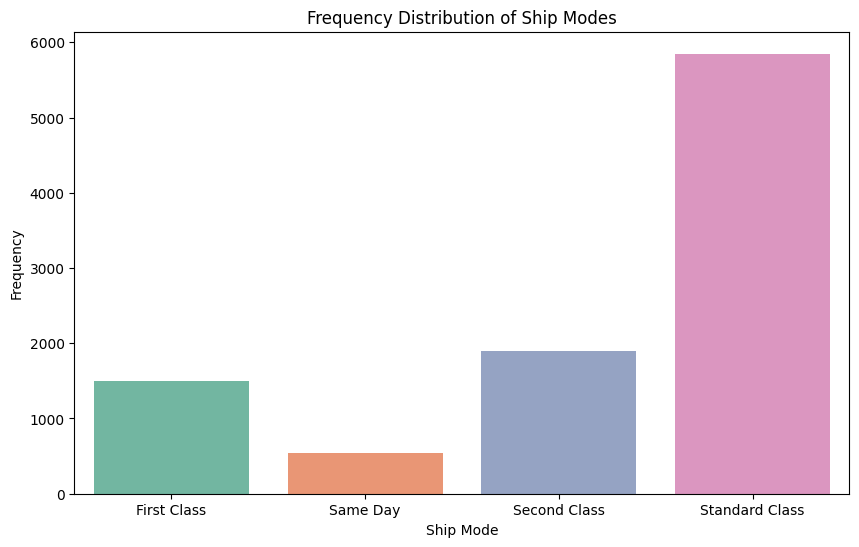

In [ ]:
# Plot the frequency distribution of ship modes
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Ship Mode'])
sns.countplot(data=df, x='Ship Mode', palette='Set2')
plt.title('Frequency Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.show()

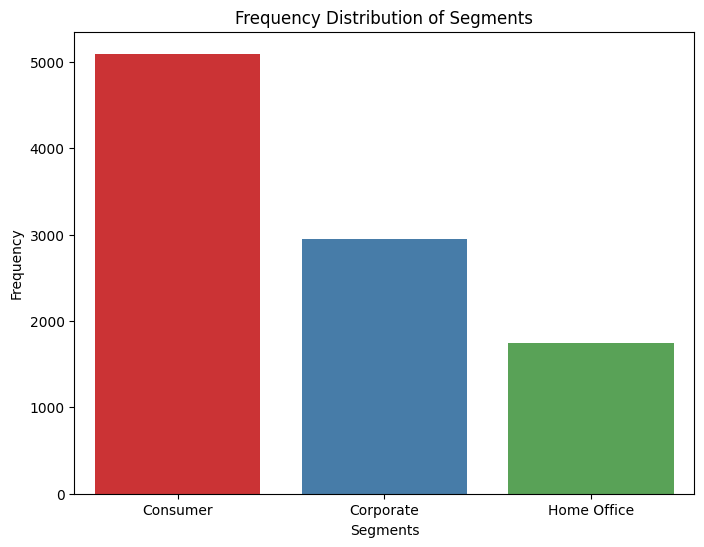

In [ ]:
plt.figure(figsize=(8, 6))
#sns.countplot(x=df['Segment'])
sns.countplot(data=df, x='Segment', palette='Set1')
plt.title('Frequency Distribution of Segments')
plt.xlabel('Segments')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Country'].nunique()

1

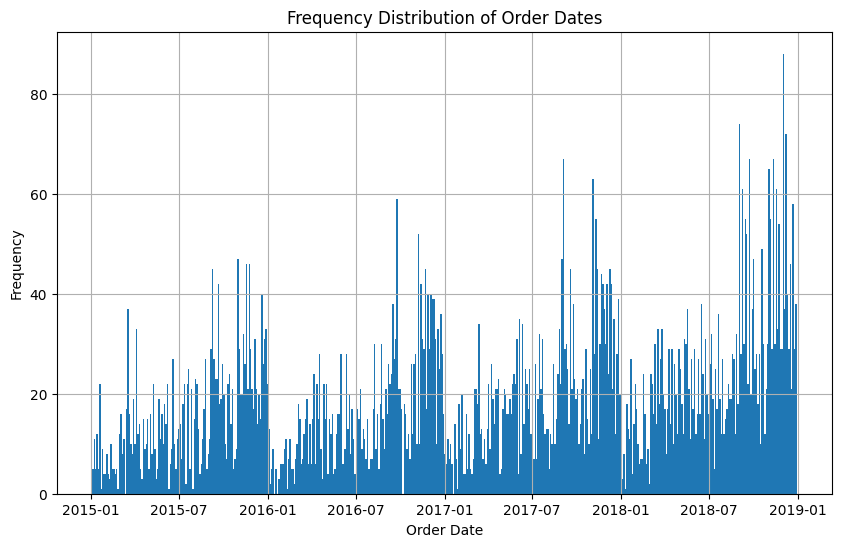

In [ ]:
plt.figure(figsize=(10, 6))
df['Order Date'].hist(bins=500)
plt.title('Frequency Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of Regions')

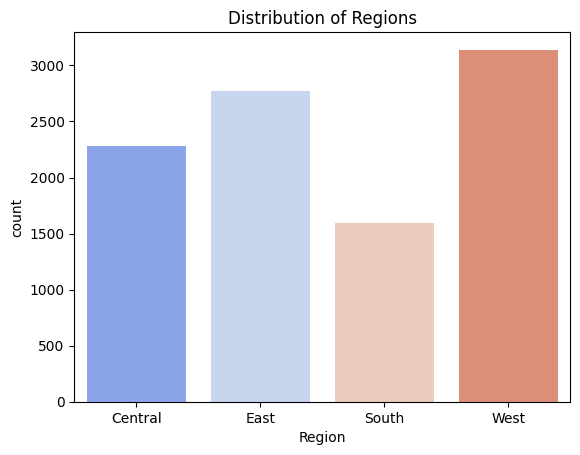

In [ ]:
sns.countplot(data=df, x='Region', palette='coolwarm')
plt.title("Distribution of Regions")


In [ ]:
category_counts = df['Category'].value_counts()
# print(df.sample())
# Find the most frequent category
most_frequent_category = category_counts.idxmax()
most_frequent_category_count = category_counts.max()

print(f"The most frequent product category is {most_frequent_category} with {most_frequent_category_count} entries")

The most frequent product category is Office Supplies with 5903 entries


In [ ]:
df.sample()

Order ID Order Date  Ship Date     Ship Mode Customer ID  \
7881  CA-2018-118017 2018-12-03 2018-12-06  Second Class    LC-16870   

       Segment        Country      City     State Region       Product ID  \
7881  Consumer  United States  Thornton  Colorado   West  TEC-AC-10002006   

        Category Sub-Category                      Product Name   Sales  
7881  Technology  Accessories  Memorex Micro Travel Drive 16 GB  76.752

In [ ]:
df['Year']=df['Order Date'].dt.year
yearly_sales=df.groupby('Year')['Sales'].sum()
yearly_sales.index,yearly_sales.values

(Index([2015, 2016, 2017, 2018], dtype='int32', name='Year'),
 array([479574.8361, 454315.9054, 597225.49  , 721209.8092]))

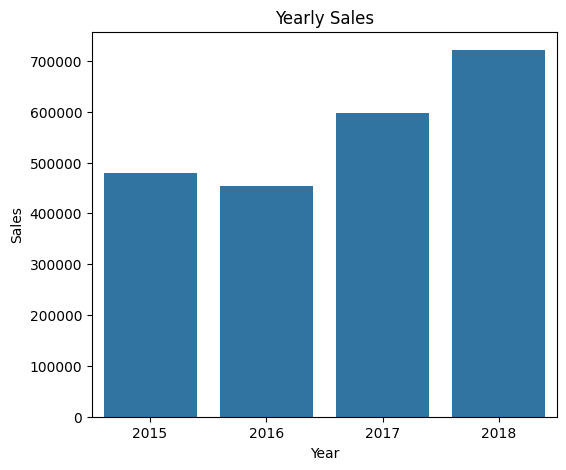

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

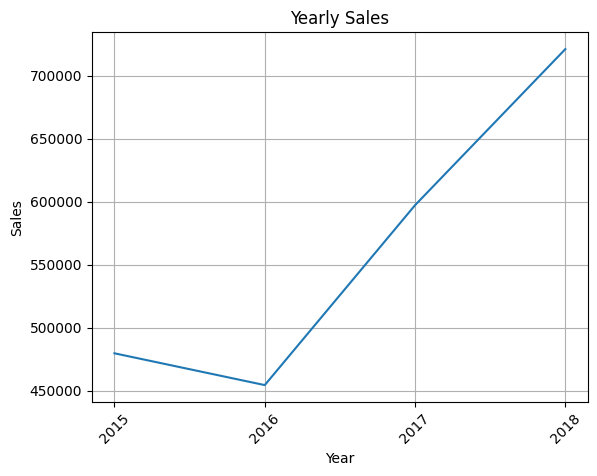

In [ ]:
plt.plot(yearly_sales.index,yearly_sales.values)
plt.xticks(yearly_sales.index, rotation=45)
plt.grid(True)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

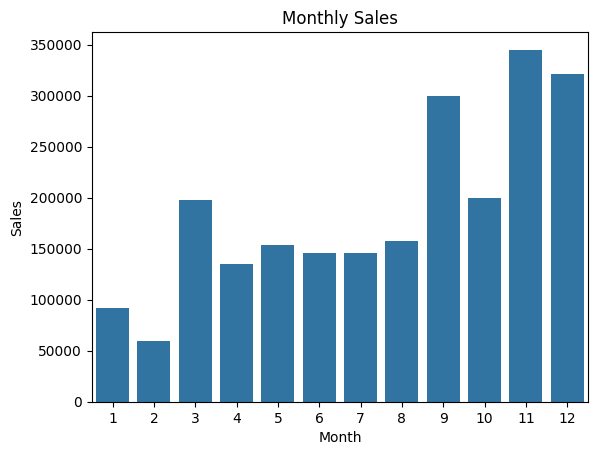

In [ ]:
df['Month']=df['Order Date'].dt.month
monthly_sales=df.groupby('Month')['Sales'].sum()
sns.barplot(x=monthly_sales.index,y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
df['Order Date'].nunique()

1229

In [ ]:
order_date_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
print(order_date_sales.head())

  Order Date     Sales
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158


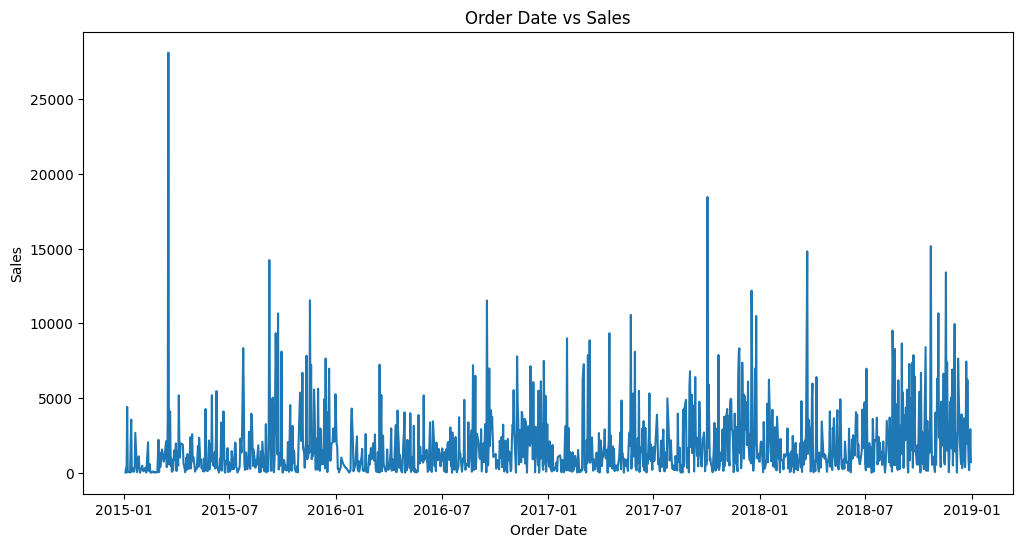

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sales', data=order_date_sales)
plt.title('Order Date vs Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Segment        Country             City       State Region  \
0   Consumer  United States        Henderson    Kentucky  South   
1   Consumer  United States        Henderson    Kentucky  South   
2  Corporate  United States      Los Angeles  California   West   
3   Consumer  United States  Fort Lauderdale     Florida  South   
4   Consumer  United States  Fort Lauderdale     Florida  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Year  Month  
0                  Bush Somerset Collection Bookcase  261.9600  2017     11  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  2017     11  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  2017      6  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  2016     10  
4                     Eldon Fold 'N Roll Cart System   22.3680  2016     10

# **Implementing ARIMA**

In [ ]:
df = df.sort_values(by='Order Date')
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7980  CA-2015-103800 2015-01-03 2015-01-07  Standard Class    DP-13000   
741   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
740   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
739   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
1759  CA-2015-141817 2015-01-05 2015-01-12  Standard Class    MB-18085   

          Segment        Country          City         State   Region  \
7980     Consumer  United States       Houston         Texas  Central   
741   Home Office  United States    Naperville      Illinois  Central   
740   Home Office  United States    Naperville      Illinois  Central   
739   Home Office  United States    Naperville      Illinois  Central   
1759     Consumer  United States  Philadelphia  Pennsylvania     East   

           Product ID         Category Sub-Category  \
7980  OFF-PA-10000174  Office Supplies        Paper   
741   OFF-BI-10004094  Office Supplies      Binders   
740   OFF-ST-10002743  Office Supplies      Storage   
739   OFF-LA-10003223  Office Supplies       Labels   
1759  OFF-AR-10003478  Office Supplies          Art   

                                           Product Name    Sales  Year  Month  
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448  2015      1  
741          GBC Standard Plastic Binding Systems Combs    3.540  2015      1  
740                       SAFCO Boltless Steel Shelving  272.736  2015      1  
739                                           Avery 508   11.784  2015      1  
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536  2015      1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
#ADF test to measure stationarity
# result[0] ->test statistic , more -ve means more stationary
# result[1] ->p-value, low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that the time series is stationary.
result = adfuller(df['Sales'])

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

ADF Statistic: -98.402719
p-value: 0.000000


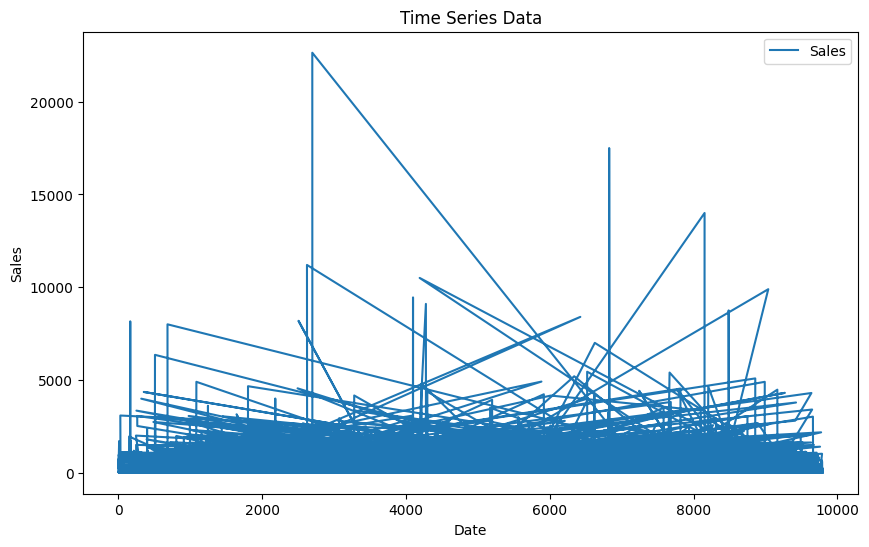

In [ ]:
#Plotting: Use plots (like autocorrelation and partial autocorrelation plots) to estimate ‘p’ and ‘q’.
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'].index, df['Sales'], label='Sales')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# train_size = int(len(df) * 0.8)
# train, test = df.iloc[:train_size], df.iloc[train_size:]
# train.shape, test.shape

<Axes: >

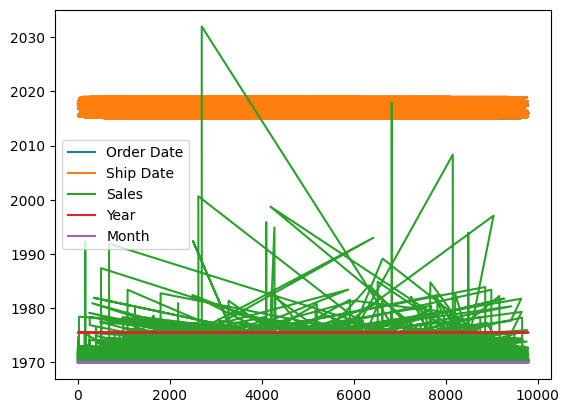

In [ ]:
df.plot()

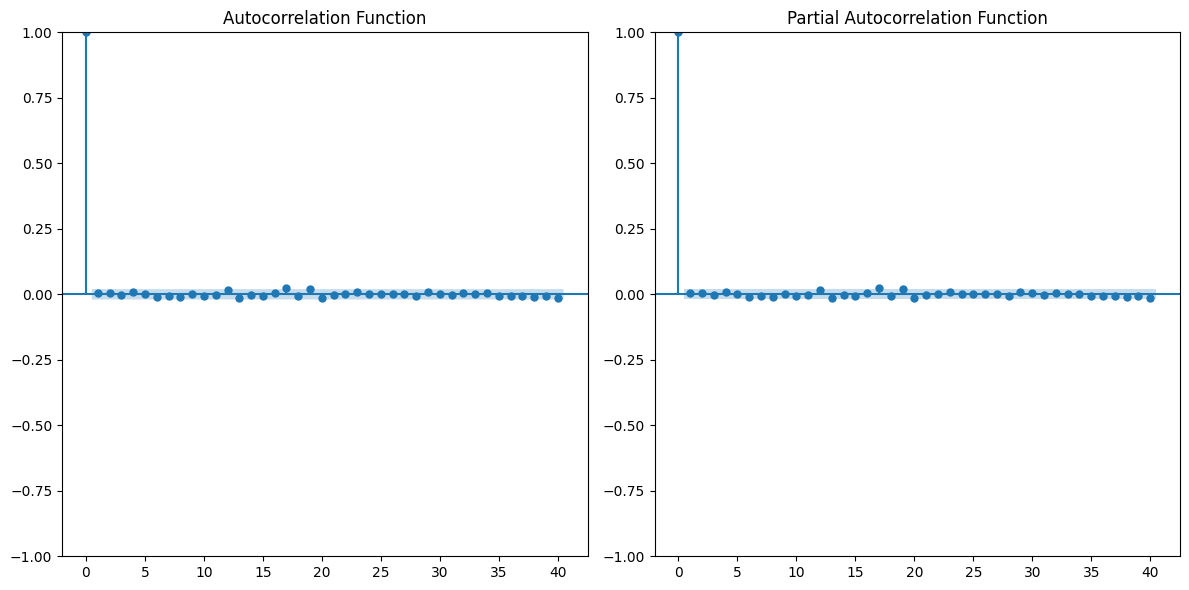

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(df['Sales'], ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(122)
plot_pacf(df['Sales'], ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [ ]:
p=0;d=0;q=0
model = ARIMA(df['Sales'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 9788
Model:                          ARIMA   Log Likelihood              -76906.035
Date:                Thu, 04 Jul 2024   AIC                         153816.071
Time:                        11:08:40   BIC                         153830.449
Sample:                             0   HQIC                        153820.943
                               - 9788                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.1110      9.463     24.317      0.000     211.564     248.658
sigma2      3.923e+05    675.299    580.883      0.000    3.91e+05    3.94e+05
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [ ]:
!pip install pmdarima
import pmdarima as pm
autoarima=pm.auto_arima(df['Sales'],seasonal=False,stepwise=False)
autoarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:00


ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
p=5;d=0;q=0
model = ARIMA(df['Sales'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 9788
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -76905.327
Date:                Thu, 04 Jul 2024   AIC                         153824.655
Time:                        11:11:08   BIC                         153874.977
Sample:                             0   HQIC                        153841.707
                               - 9788                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.1110      9.671     23.794      0.000     211.156     249.065
ar.L1          0.0052      0.011      0.480      0.631      -0.016       0.027
ar.L2          0.0061      0.014      0.450      0.6

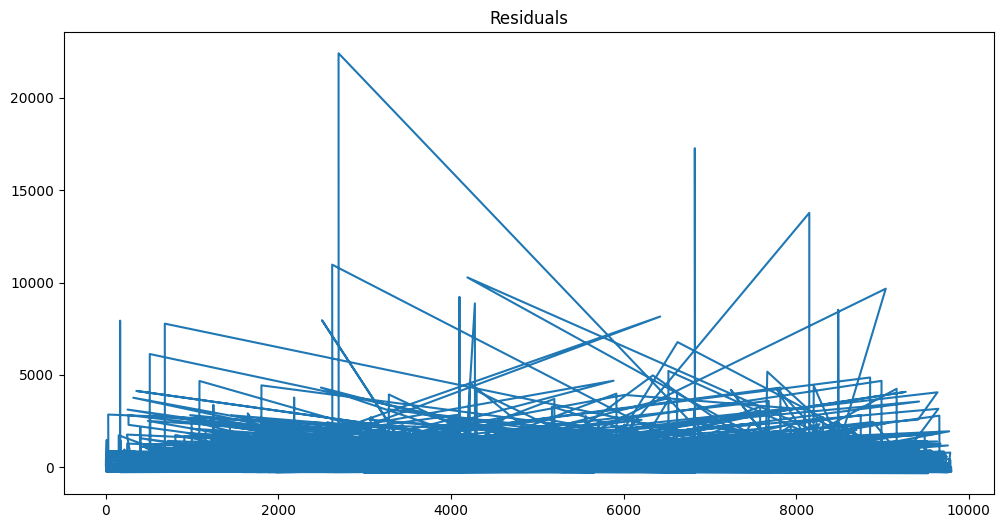

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

Retry

In [ ]:
df.sort_values(by='Order Date',inplace=True)
df['OrderDatePeriodDay'] = df['Order Date'].dt.to_period("D")
df['OrderDatePeriodMonth'] = df['Order Date'].dt.to_period("M")
df['OrderDatePeriodYear'] = df['Order Date'].dt.to_period("Y")
df['OrderDatePeriodWeek'] = df['Order Date'].dt.to_period("W")
df.tail()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1297  CA-2018-115427 2018-12-30 2019-01-03  Standard Class    EB-13975   
906   CA-2018-143259 2018-12-30 2019-01-03  Standard Class    PO-18865   
908   CA-2018-143259 2018-12-30 2019-01-03  Standard Class    PO-18865   
907   CA-2018-143259 2018-12-30 2019-01-03  Standard Class    PO-18865   
5091  CA-2018-156720 2018-12-30 2019-01-03  Standard Class    JM-15580   

        Segment        Country           City       State Region  ...  \
1297  Corporate  United States      Fairfield  California   West  ...   
906    Consumer  United States  New York City    New York   East  ...   
908    Consumer  United States  New York City    New York   East  ...   
907    Consumer  United States  New York City    New York   East  ...   
5091   Consumer  United States       Loveland    Colorado   West  ...   

             Category Sub-Category  \
1297  Office Supplies      Binders   
906         Furniture    Bookcases   
908   Office Supplies      Binders   
907        Technology       Phones   
5091  Office Supplies    Fasteners   

                                           Product Name    Sales  Year  Month  \
1297                                 GBC Binding covers   20.720  2018     12   
906   Bush Westfield Collection Bookcases, Fully Ass...  323.136  2018     12   
908                Wilson Jones Legal Size Ring Binders   52.776  2018     12   
907                           Gear Head AU3700S Headset   90.930  2018     12   
5091                                Bagged Rubber Bands    3.024  2018     12   

      OrderDatePeriodDay OrderDatePeriodMonth OrderDatePeriodYear  \
1297          2018-12-30              2018-12                2018   
906           2018-12-30              2018-12                2018   
908           2018-12-30              2018-12                2018   
907           2018-12-30              2018-12                2018   
5091          2018-12-30              2018-12                2018   

        OrderDatePeriodWeek  
1297  2018-12-24/2018-12-30  
906   2018-12-24/2018-12-30  
908   2018-12-24/2018-12-30  
907   2018-12-24/2018-12-30  
5091  2018-12-24/2018-12-30  

[5 rows x 21 columns]

In [ ]:
df_sales_per_month=df[['OrderDatePeriodMonth','Sales']].groupby('OrderDatePeriodMonth').sum()
df_sales_per_month.shape

(48, 1)

<Axes: title={'center': 'Sales'}, xlabel='Order Date'>

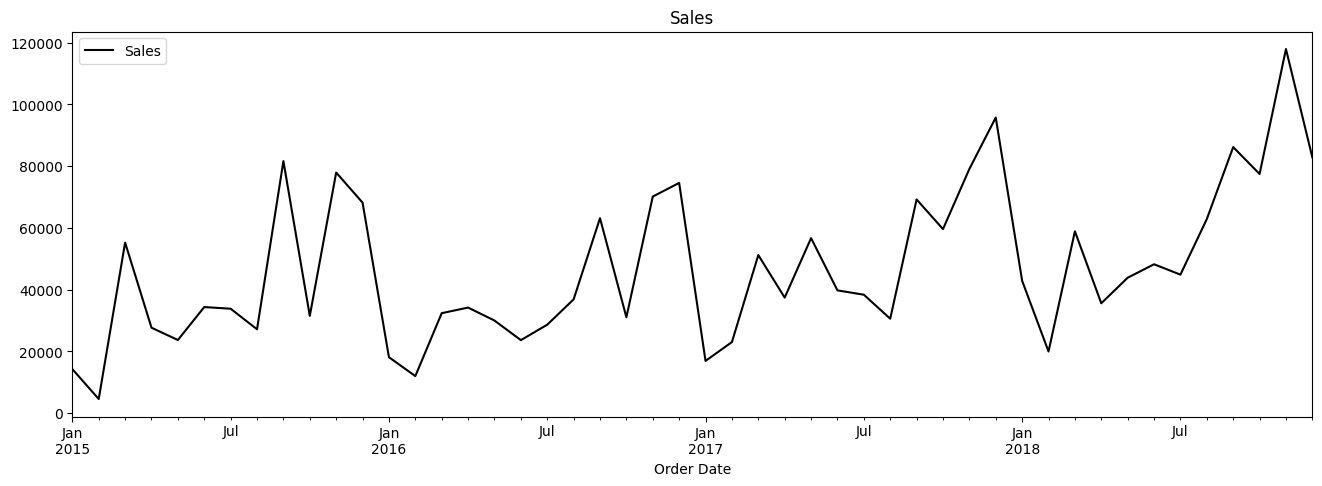

In [ ]:
df_sales_per_month.plot(kind='line',y='Sales',xlabel='Order Date',title="Sales",figsize=(16,5),color = "black")

<Axes: title={'center': 'Sales'}, xlabel='Order Date'>

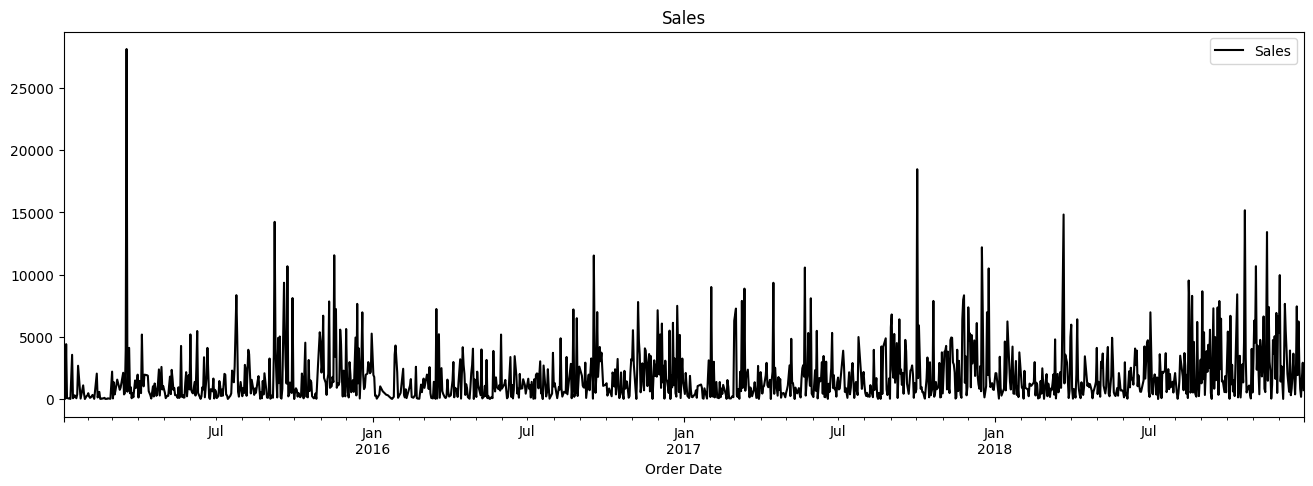

In [ ]:
df_sales_per_day=df[['OrderDatePeriodDay','Sales']].groupby('OrderDatePeriodDay').sum()
df_sales_per_day.head()
df_sales_per_day.plot(kind='line',y='Sales',xlabel='Order Date',title="Sales",figsize=(16,5),color = "black")

In [ ]:
df_train=df_sales_per_month[df_sales_per_month.index<=pd.to_datetime("2018-07-01",format='%Y-%m-%d').to_period("M")]
df_test=df_sales_per_month[df_sales_per_month.index>=pd.to_datetime("2018-07-01",format='%Y-%m-%d').to_period("M")]

In [ ]:
df_train.index = df_train.index.to_timestamp()
df_test.index = df_test.index.to_timestamp()

In [ ]:
df_train.shape,df_test.shape

((43, 1), (6, 1))

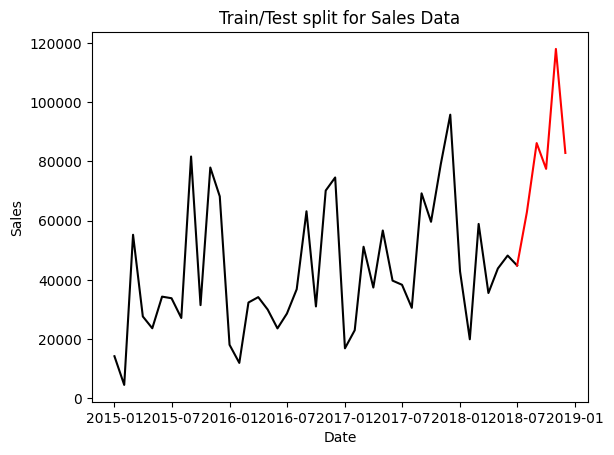

In [ ]:
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.ylabel('Sales')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.rcParams["figure.figsize"] = (16,5)
plt.show()

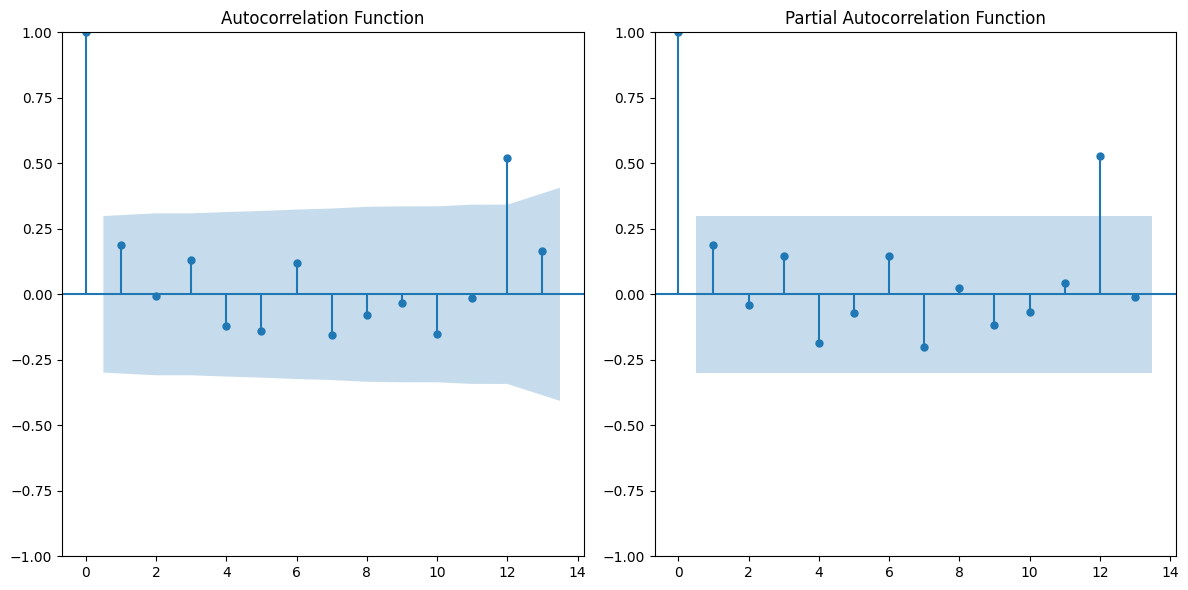

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(df_train, ax=plt.gca(), lags=13)
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(122)
plot_pacf(df_train, ax=plt.gca(), lags=13)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [ ]:
def check_stationarity(timeseries):
	# Perform the Dickey-Fuller test
	result = adfuller(timeseries, autolag='AIC')
	p_value = result[1]
	print(f'ADF Statistic: {result[0]}')
	print(f'p-value: {p_value}')
	print('Stationary' if p_value < 0.05 else 'Non-Stationary')

check_stationarity(df_train['Sales'])

ADF Statistic: -5.351736013976044
p-value: 4.274432649943498e-06
Stationary


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y=df_train['Sales']
SARIMAXmodel = SARIMAX(y, seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

In [ ]:
y_pred = SARIMAXmodel.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"]

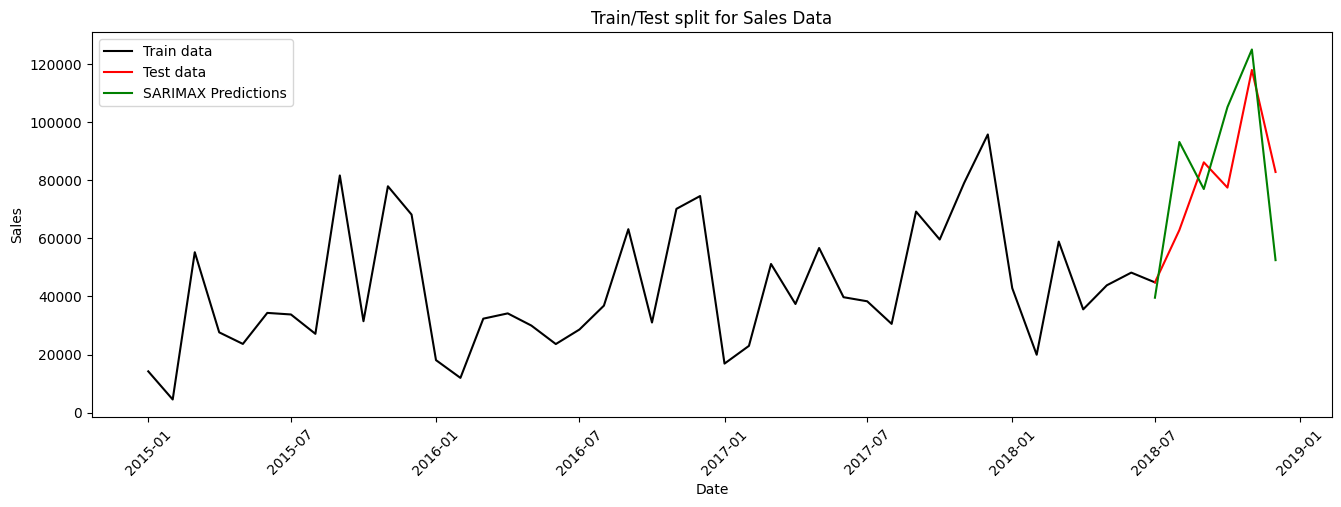

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train, color = 'black', label = 'Train data')
plt.plot(df_test, color = 'red',label='Test data')
plt.plot(y_pred_out, color='green', label = 'SARIMAX Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.rcParams["figure.figsize"] = (16,5)
plt.legend()
plt.show()

# **Prophet**

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
df_prophet=df[['Order Date','Sales']]
df_prophet.head()

Order Date    Sales
7980 2015-01-03   16.448
741  2015-01-04    3.540
740  2015-01-04  272.736
739  2015-01-04   11.784
1759 2015-01-05   19.536

In [ ]:
df_prophet.columns=['ds','y']
df_prophet.head()

ds        y
7980 2015-01-03   16.448
741  2015-01-04    3.540
740  2015-01-04  272.736
739  2015-01-04   11.784
1759 2015-01-05   19.536

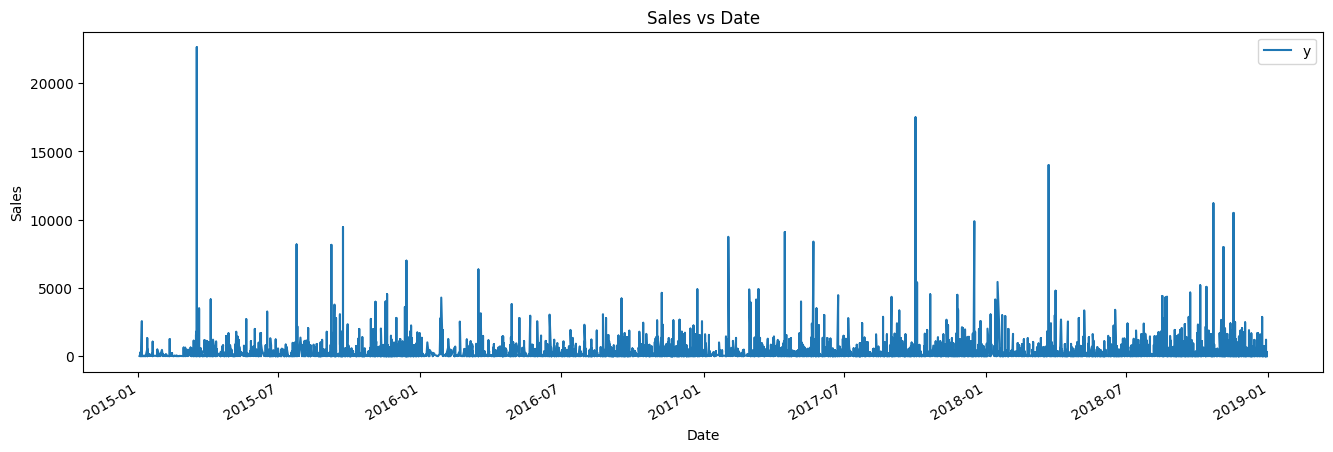

In [ ]:
ax=df_prophet.set_index('ds').plot(figsize=(16,5))
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
ax.set_title('Sales vs Date')
plt.show()

In [ ]:
mymodel=Prophet(interval_width=0.95)
mymodel.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw6on703/hbrb3nqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw6on703/nch2m8d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63512', 'data', 'file=/tmp/tmppw6on703/hbrb3nqq.json', 'init=/tmp/tmppw6on703/nch2m8d_.json', 'output', 'file=/tmp/tmppw6on703/prophet_modellfqn9ssm/prophet_model-20240704111139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=mymodel.make_future_dataframe(periods=365)
future.shape
forecast=mymodel.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

ds        yhat   yhat_lower   yhat_upper
0    2015-01-03  241.609824 -1007.984247  1464.284058
1    2015-01-04  227.824448  -969.444335  1436.868493
2    2015-01-05  221.246040  -957.530677  1538.977030
3    2015-01-06  220.765606  -999.378381  1397.512384
4    2015-01-07  256.140346 -1038.604301  1473.195476
...         ...         ...          ...          ...
1589 2019-12-26  245.533550 -1058.126479  1476.720388
1590 2019-12-27  201.557866  -987.555398  1382.620646
1591 2019-12-28  214.851343 -1055.142338  1391.987104
1592 2019-12-29  200.870626 -1039.875040  1335.589006
1593 2019-12-30  193.668148 -1003.332056  1431.559629

[1594 rows x 4 columns]

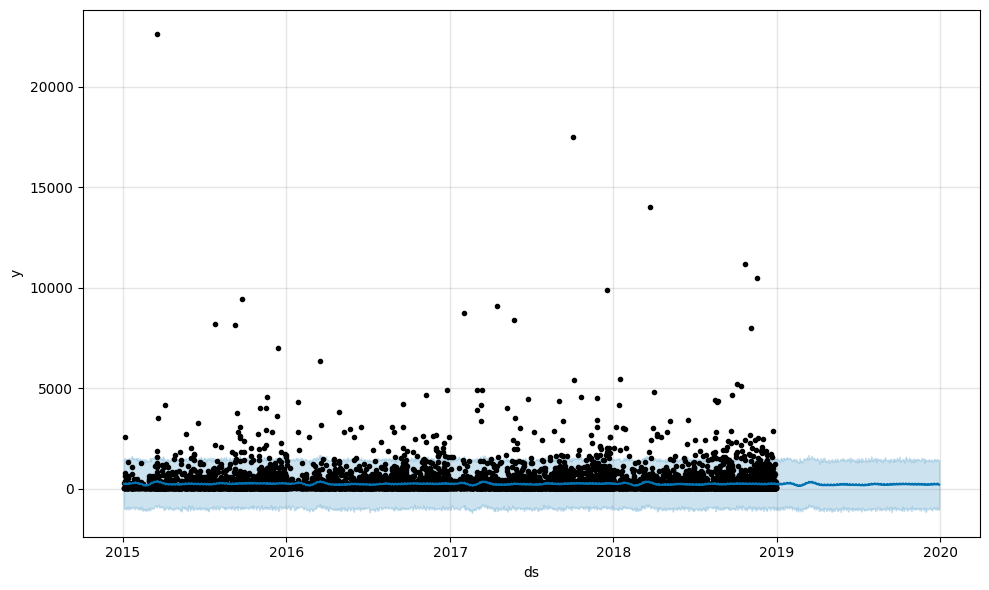

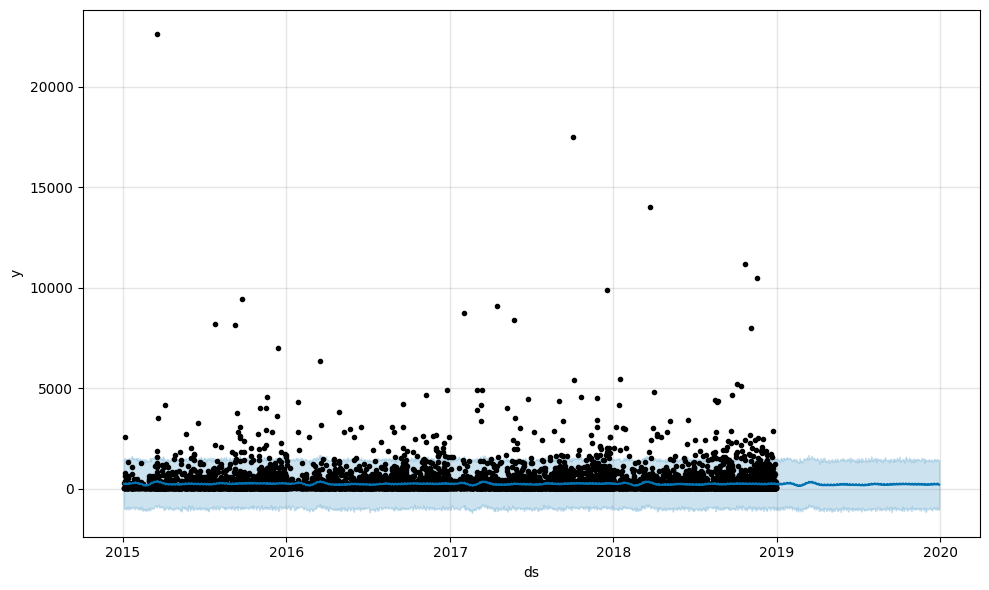

In [ ]:
mymodel.plot(forecast,uncertainty=True)

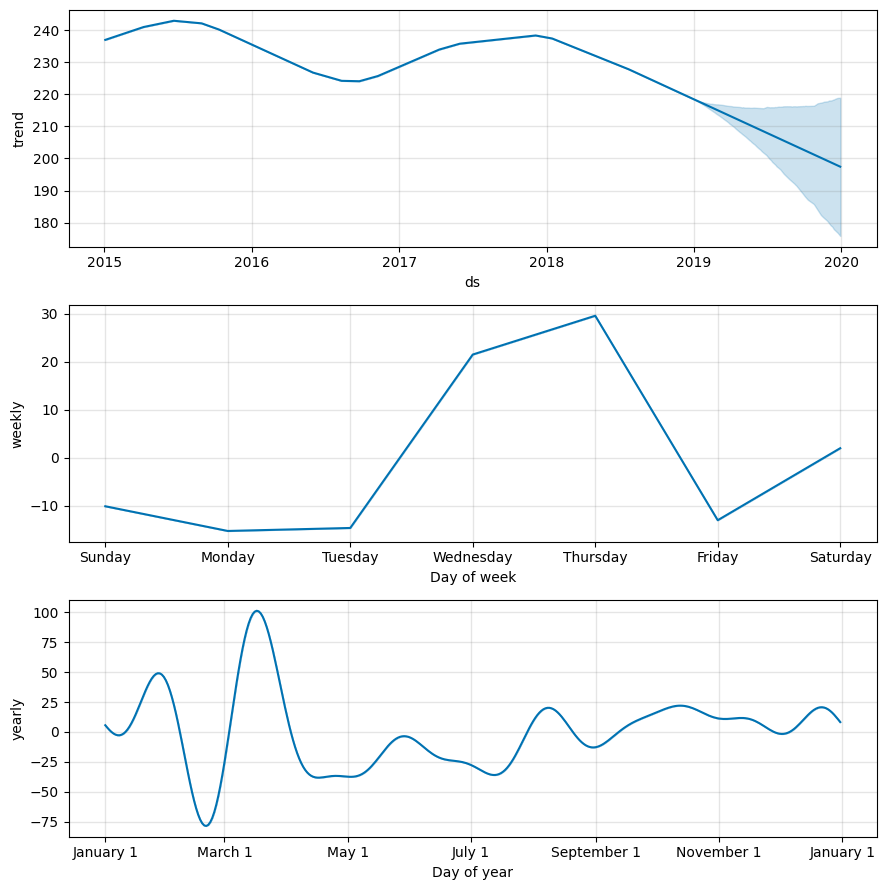

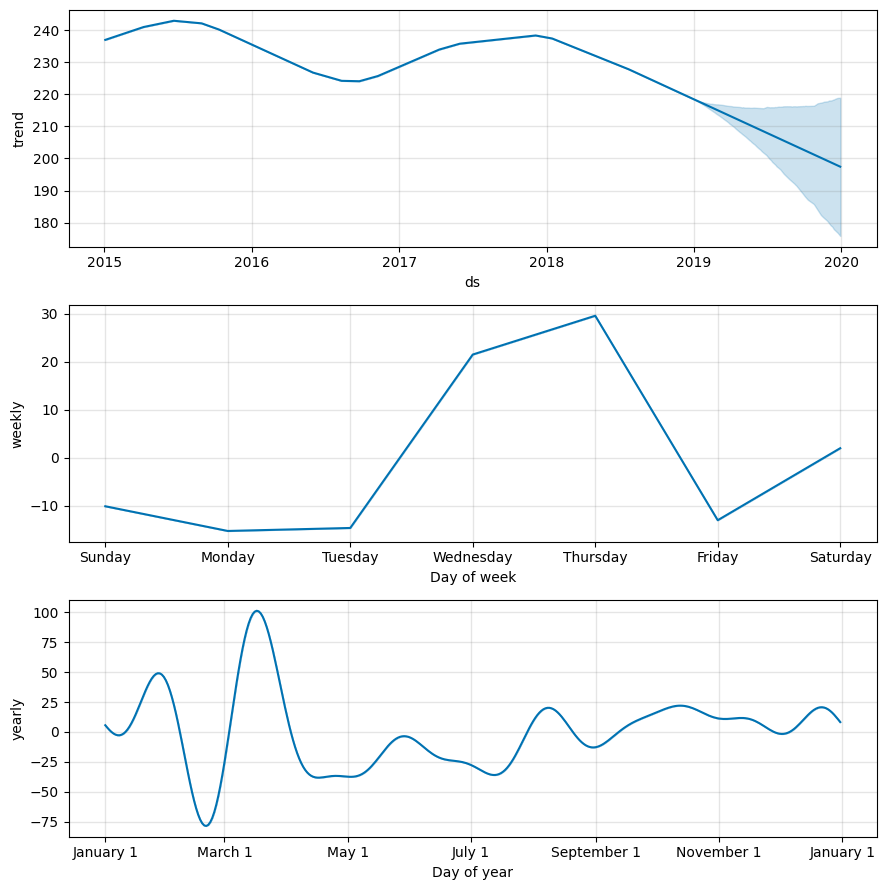

In [ ]:
mymodel.plot_components(forecast)

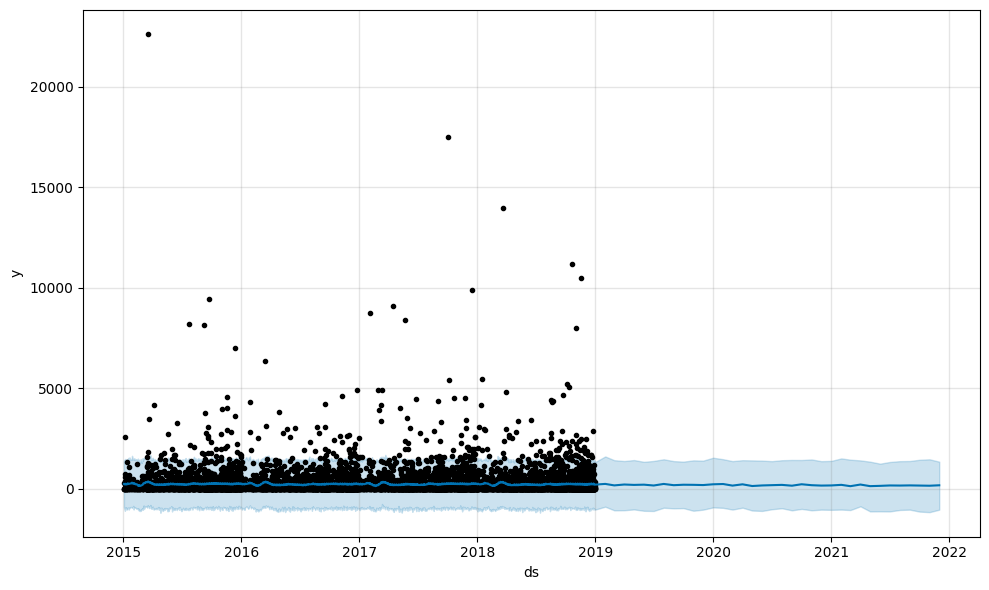

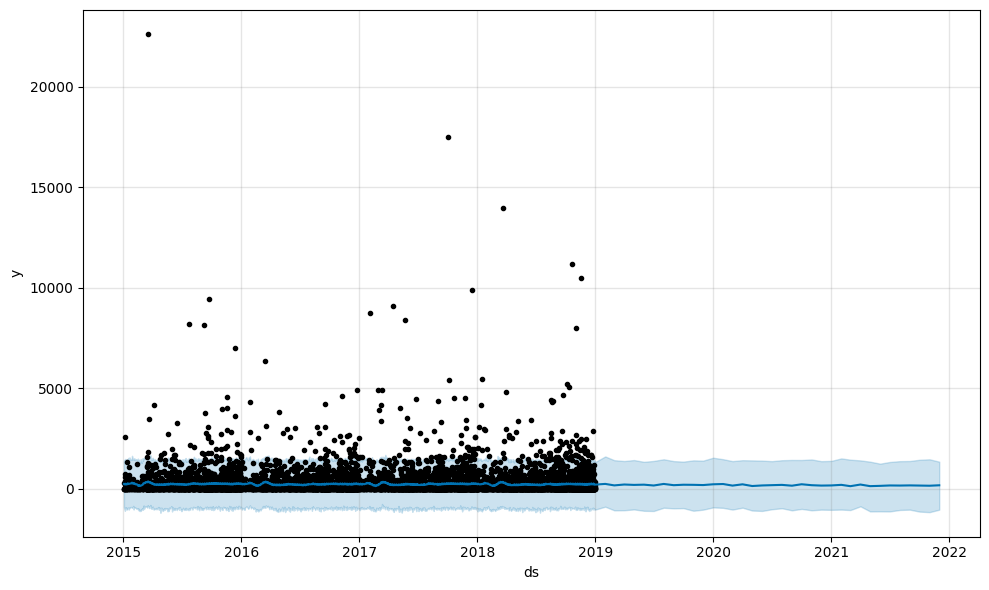

In [ ]:
future1=mymodel.make_future_dataframe(periods=36,freq='MS')
forecast1=mymodel.predict(future1)
mymodel.plot(forecast1)
#forecast1[['ds','yhat','yhat_lower','yhat_upper']]

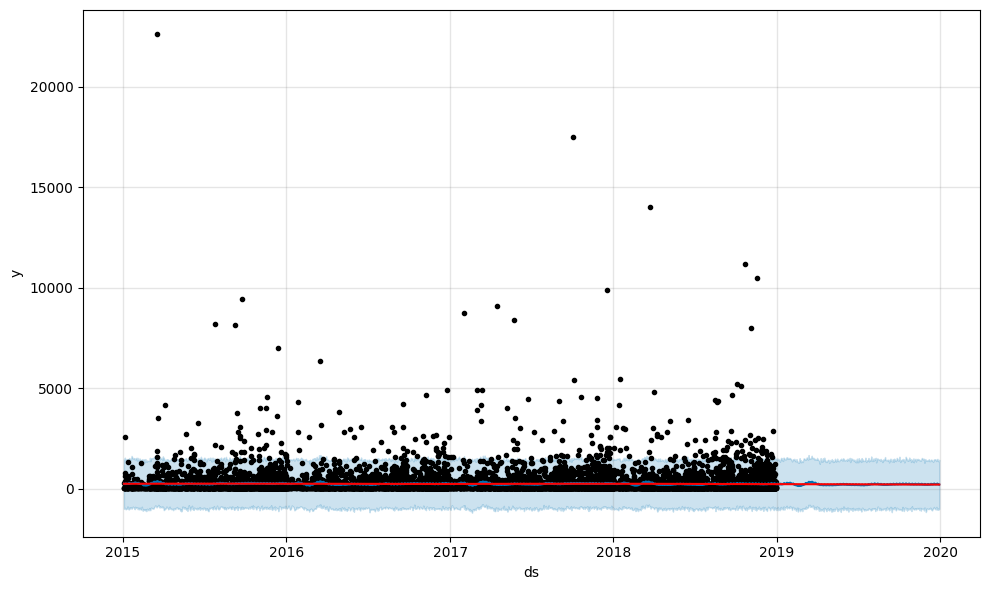

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = mymodel.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), mymodel, forecast)


In [ ]:
# df_sales_per_month.drop(columns=['Date'],inplace=True)
# df_sales_per_month.head()

In [ ]:
df_sales_per_month_reset=df_sales_per_month.reset_index()
df_sales_per_month_reset.head()

OrderDatePeriodMonth      Sales
0              2015-01  14205.707
1              2015-02   4519.892
2              2015-03  55205.797
3              2015-04  27625.483
4              2015-05  23644.303

In [ ]:
df_sales_per_month_reset = df_sales_per_month_reset.rename(columns={'OrderDatePeriodMonth': 'ds','Sales': 'y'})
df_sales_per_month_reset.head()

ds          y
0  2015-01  14205.707
1  2015-02   4519.892
2  2015-03  55205.797
3  2015-04  27625.483
4  2015-05  23644.303

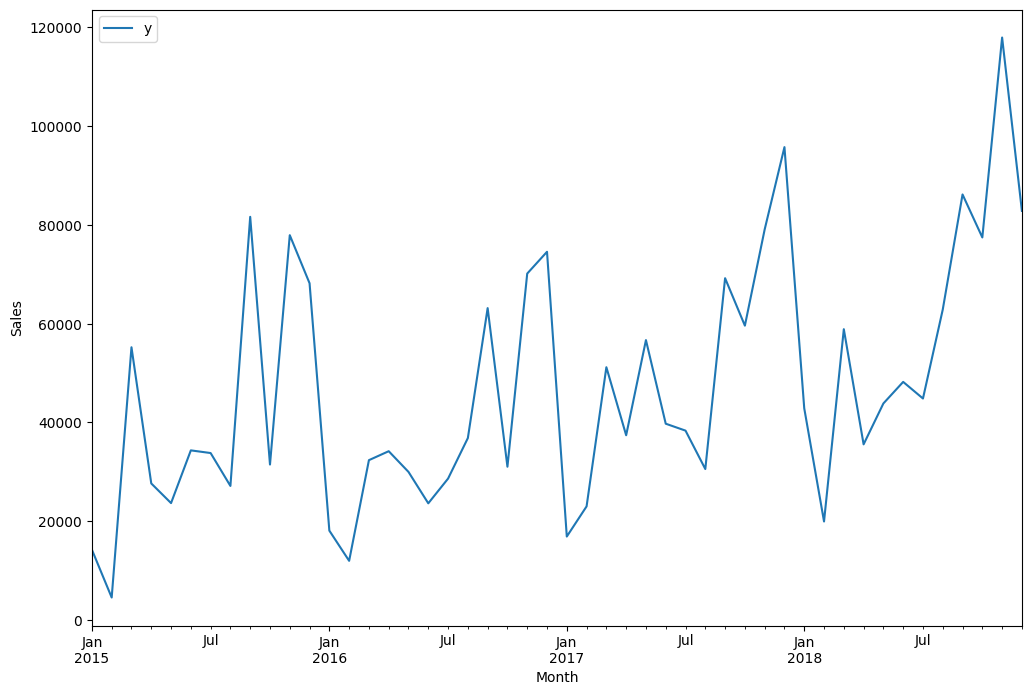

In [ ]:
ax = df_sales_per_month_reset.set_index(['ds']).plot(figsize=(12, 8))
ax.set_ylabel('Sales')
ax.set_xlabel('Month')

plt.show()

In [ ]:
#df_sales_per_month_reset
df_sales_per_month_reset['ds'] = pd.PeriodIndex(df_sales_per_month_reset['ds'], freq='M').to_timestamp()
df_sales_per_month_reset['ds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48 entries, 0 to 47
Series name: ds
Non-Null Count  Dtype         
--------------  -----         
48 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 512.0 bytes


In [ ]:
df_sales_per_month_reset.head()

ds          y
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27625.483
4 2015-05-01  23644.303

In [ ]:
mynewmodel=Prophet(interval_width=0.95)
mynewmodel.fit(df_sales_per_month_reset)
future_dates = mynewmodel.make_future_dataframe(periods=24, freq='MS')
future_dates.head()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw6on703/w6y98xyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw6on703/uoegtj_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35757', 'data', 'file=/tmp/tmppw6on703/w6y98xyb.json', 'init=/tmp/tmppw6on703/uoegtj_e.json', 'output', 'file=/tmp/tmppw6on703/prophet_model9s7_nryy/prophet_model-20240704111150.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
0 2015-01-01
1 2015-02-01
2 2015-03-01
3 2015-04-01
4 2015-05-01

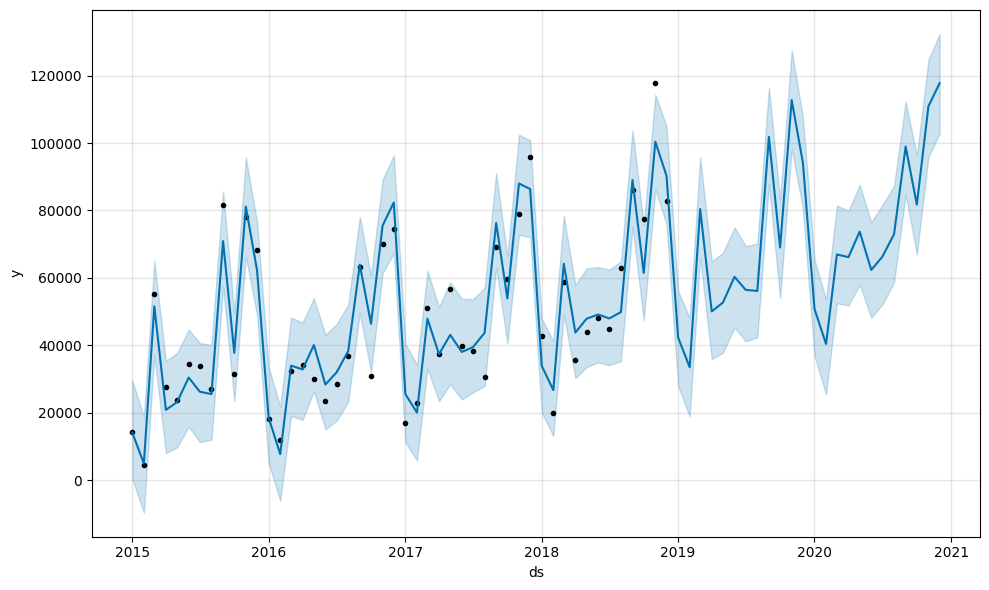

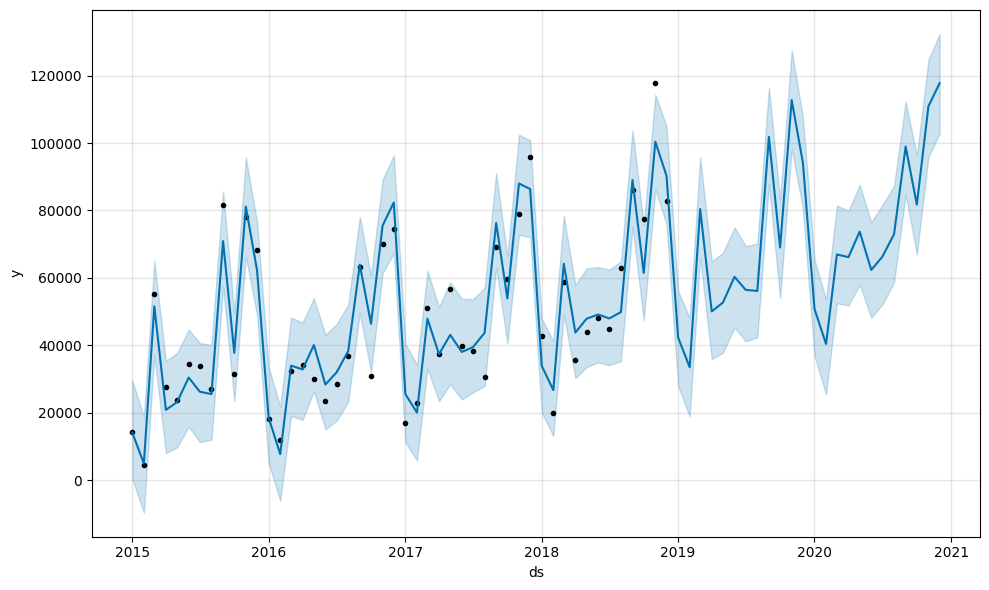

In [ ]:
forecast=mynewmodel.predict(future_dates)
mynewmodel.plot(forecast, uncertainty=True)

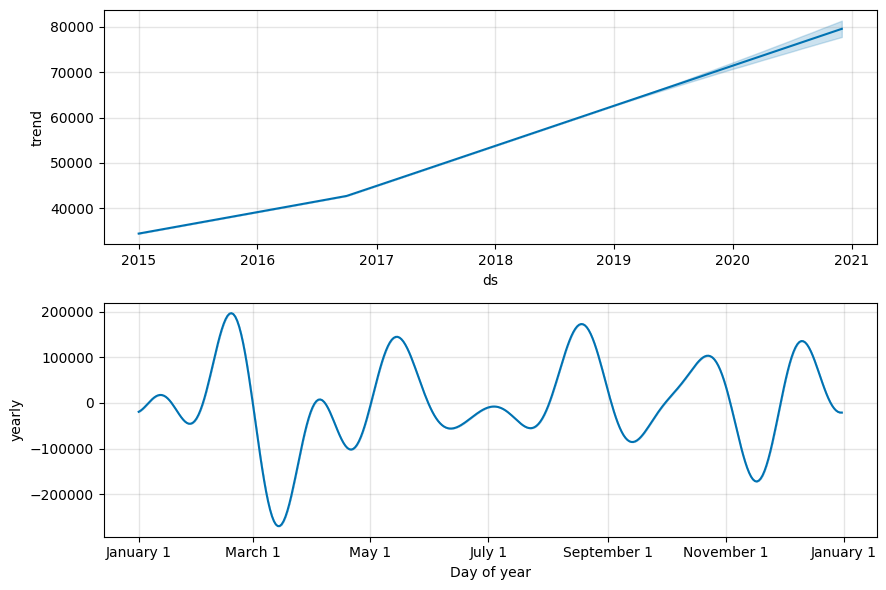

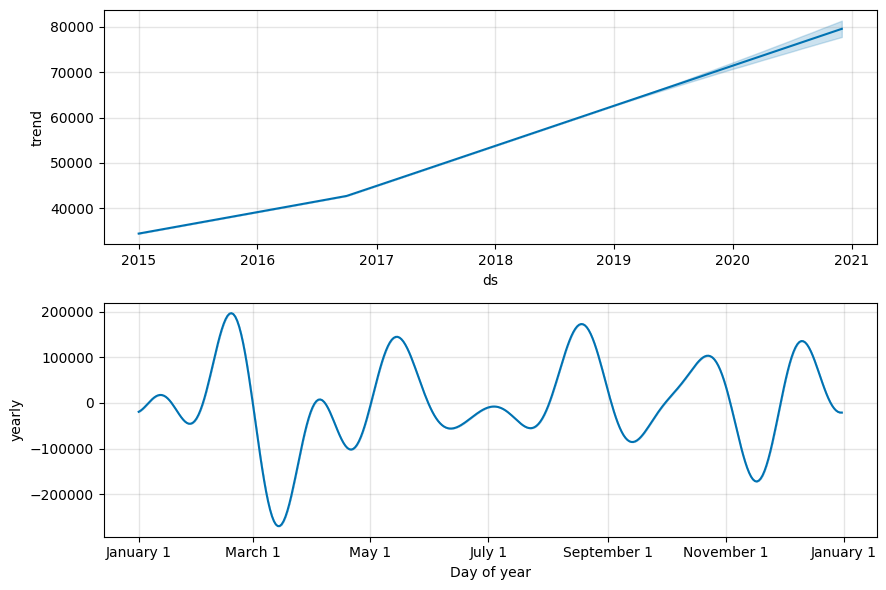

In [ ]:
mynewmodel.plot_components(forecast)

# **LSTM network using Keras**

In [ ]:
! pip install keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'keras.layers.recurrent'